<a href="https://colab.research.google.com/github/Areefahnk/NNDL-18K41A0505/blob/main/Assignment_12_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

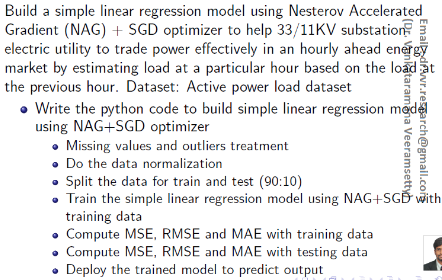

In [7]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Load_Data_in_kW.xlsx',header=None)
df.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


**MISSING VALUES**

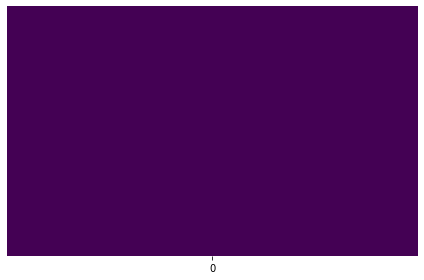

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

**Therefore no missing values**

**Outliers**

In [11]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
#print(z)

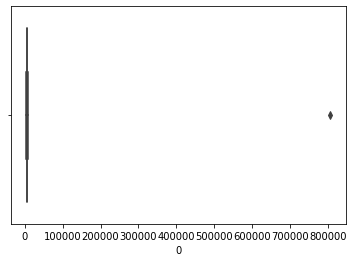

In [12]:
sns.boxplot(x=df[0])

In [13]:
#Filtering the outliers

q = df[0].quantile(0.99)
df[df[0] < q]
q_low = df[0].quantile(0.01)
q_hi  = df[0].quantile(0.99)

df_filtered = df[(df[0] < q_hi) & (df[0] > q_low)]
df_filtered.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


**Confirmation of outliers**

In [16]:
print(len(df))
print(len(df_filtered))
if(len(df) == len(df_filtered)):
    print('Hence there are No outliners')
else:
  df = df_filtered.copy()
  ("There are outliers. SO consider only filtered data")

2140
2140
Hence there are No outliners


**Normalization**

In [18]:
data_n = df.copy()
data_n = (data_n - data_n.min())/(data_n.max() - data_n.min())
data_n.head()

,0
0,0.372950
1,0.254941
2,0.235273
3,0.273574
4,0.299162


In [20]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data_n,test_size=0.1)

In [23]:
x1 = []
y1 = []
for i in range(len(train_data.iloc[:,0])-24):
    x1.append(train_data.iloc[i,0])
    y1.append(train_data.iloc[i+24,0])

In [29]:
import sympy as sym
from sympy import *
import random

mi=1
ci=-1
lr=0.1
epochs=5
gama=0.9
iter=1
sample=1
vm = vc = 0 #assuming to start from zero velocity
ns = len(x1) #number of samples in training dataset
while iter<=epochs:
  print('ITERATION {}'.format(iter))
  sample = 1
  while sample<=ns:
    print("Sample {}".format(sample))
    #step 4: Error function for Gradient descent
    #declare the variables that you will be using in the error function
    x=sym.Symbol('x')
    y=sym.Symbol('y')
    m=sym.Symbol('m')
    c=sym.Symbol('c')
    E=(0.5)*(y-m*x-c)**2  #ERROR FUNCTION


    derivE_m=sym.diff(E,m) #differentiation of E wrto m
    derivE_c=sym.diff(E,c)  #differentiate E wrto c
    #print(derivE_m)
    #print(derivE_c)
    #print('after subs m and c')
    #print('in derivE_m')
    derivE_m = derivE_m.subs(m, mi) 
    derivE_m = derivE_m.subs(c, ci)

    xi =  x1[sample-1]
    yi = y1[sample-1]
    derivE_m = derivE_m.subs(x,xi)
    derivE_m = derivE_m.subs(y,yi)

    #print(derivE_m)
    #print('in derivE_c')
    derivE_c = derivE_c.subs(m, mi) 
    derivE_c = derivE_c.subs(c, ci)
    derivE_c = derivE_c.subs(x,xi)
    derivE_c = derivE_c.subs(y,yi)

    gm = derivE_m
    gc = derivE_c

    #step 5 compute velocity (before steplen)
    vm = gama*vm - lr*gm
    vc = gama*vc - lr*gc

    #step 6 update model params
    mi = mi+vm
    ci = ci+vc
    print(mi)
    print(ci)
    print('-----------------------------------')
    #step 7 increment sample
    sample = sample+1

  iter=iter+1
  
  

print("Local minima values of m and c are: ",mi,ci)

Streaming output truncated to the last 5000 lines.
-0.441555391506125
0.470379773550277
-----------------------------------
Sample 654
-0.393789231317755
0.533591045870710
-----------------------------------
Sample 655
-0.348040472155522
0.593898072466503
-----------------------------------
Sample 656
-0.256816877260787
0.711255357637155
-----------------------------------
Sample 657
-0.179641553891668
0.799868680316291
-----------------------------------
Sample 658
-0.113790936644630
0.868168625619067
-----------------------------------
Sample 659
-0.0784747325289342
0.861277883867705
-----------------------------------
Sample 660
-0.0519748649349936
0.833118362915918
-----------------------------------
Sample 661
-0.0470437749887112
0.735954017597453
-----------------------------------
Sample 662
-0.0385546397301804
0.654337693916234
-----------------------------------
Sample 663
-0.0344315696850130
0.576709751533548
-----------------------------------
Sample 664
-0.0288620828334277


**TRAINING ERROR**

In [35]:

y_train_pred = [i for i in x1]
for j in range(len(x1)):
    y_train_pred[j]=(mi*x1[j] + ci)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y1,y_train_pred)
mse

0.05955696566877467

**MSE, RMSE, MAE - Training error**

In [42]:

import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
mse = math.sqrt(mean_squared_error(y1, y_train_pred)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y1, y_train_pred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y1, y_train_pred)
print('Mean absolute error', mae)

Root mean square error 0.24404295865436207
Mean square error 0.05955696566877467
Mean absolute error 0.20200766568708414


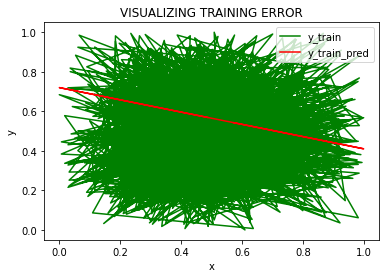

In [36]:
#Plot a line graph

import matplotlib.pyplot as plt
plt.plot(x1,y1,label='y_train',color='green')
plt.plot(x1,y_train_pred,label='y_train_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TRAINING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**TESTING ERROR**

In [37]:
x2 = []
y2 = []
for i in range(len(test_data.iloc[:,0])-24):
    x2.append(test_data.iloc[i,0])
    y2.append(test_data.iloc[i+24,0])

In [39]:

y_test_pred = [i for i in x2]
for j in range(len(x2)):
    y_test_pred[j]=(mi*x2[j] + ci)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y2,y_test_pred)
mse

0.0632549238342142

**MSE, RMSE, MAE - Testing Error**

In [41]:

import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
mse = math.sqrt(mean_squared_error(y2, y_test_pred)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y2, y_test_pred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y2, y_test_pred)
print('Mean absolute error', mae)

Root mean square error 0.25150531571760903
Mean square error 0.0632549238342142
Mean absolute error 0.2080258499139535


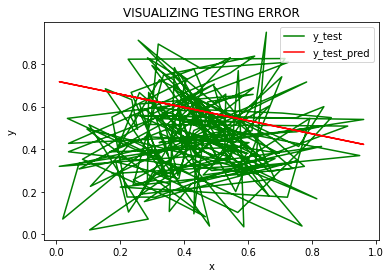

In [40]:
#Plot a line graph

import matplotlib.pyplot as plt
plt.plot(x2,y2,label='y_test',color='green')
plt.plot(x2,y_test_pred,label='y_test_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TESTING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**Deploy - Prediction**

In [46]:
x_max = y_max= 8841.669480
x_min = y_min = 3377.919600
x =x1 = float(input("Enter the load of previous hour :"))
x = (x - x_min)/(x_max - x_min)
y = mi*x + ci
y = y*(y_max - y_min) + y_min
print(f"Predicted load at hour based on its previous hour is : {y}")

Enter the load of previous hour :7861.3
Predicted load at hour based on its previous hour is : 5923.48507298636
